In [1]:
from SpyDust.AngMomDist import log_f_rot

from SpyDust.util import cgsconst

from SpyDust.Grain import *

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}


grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(6, a_weighted=True, normalize=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab

debye = cgsconst.debye

dip_per_at = CNM_params['dipole'] / np.sqrt(N_C(1e-7) + N_H(1e-7)) * debye

aind = 5
a = a_tab[aind]
beta = beta_tab[np.argmax(f_a_beta[aind, :])]
print(a, beta)

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /opt/homebrew/Caskroom/miniconda/base/envs/SpyDust/lib/python3.13/site-packages/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored
5.3382803478865665e-08 -0.3425


/opt/homebrew/Caskroom/miniconda/base/envs/SpyDust/lib/python3.13/site-packages/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


(-60.0, -10.0)

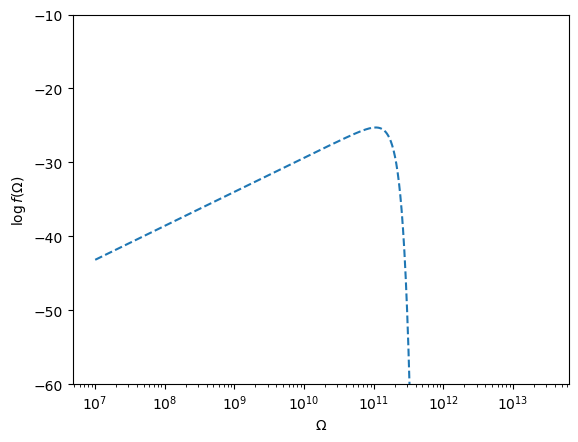

In [2]:
from SpyDust.AngMomDist import log_f_rot
from SpyDust.charge_dist import charge_dist
import matplotlib.pyplot as plt

fZ = charge_dist(CNM_params, a, beta)
Z2 = np.sum(fZ[0, :]**2 * fZ[1, :])
mu_rms = rms_dipole(a, beta, Z2, dip_per_at)
ip = 2/3
mu_ip = np.array([mu_rms * np.sqrt(ip)])
mu_op = np.array([mu_rms * np.sqrt(1 - ip)])
f_Omega_1 = log_f_rot(CNM_params, a, beta, fZ, mu_ip, mu_op, omega_min=1e7, omega_max=3e13, Nomega=1000) 

omegas = makelogtab(1e7, 3e13, 1000)

plt.plot(omegas, f_Omega_1[0], linestyle='--')
plt.xscale('log')
plt.ylabel(r'$\log f(\Omega)$')
plt.xlabel(r'$\Omega$')
plt.ylim(-60, -10)

In [3]:
from SpyDust.SED import mu2_f

In [5]:
line=7
grain_obj = grain_distribution()
f_a_beta = grain_obj.shape_and_size_dist(line, normalize=False, fixed_thickness=True)
a_tab = grain_obj.a_tab
beta_tab = grain_obj.beta_tab
mu2_rotation = mu2_f(CNM_params, a_tab, beta_tab, f_a_beta, 
                dip_per_at, 
                ip, Ndipole=1, tumbling=True, parallel=True, 
                contract_a=True, omega_min=1e7, omega_max=1e15, Nomega=1000, spdust_plasma=False)


In [6]:
beta_tab

array([-0.49  , -0.3425, -0.0475])

In [28]:
mu2_rotation = np.sum(mu2_rotation, axis=1)

In [29]:
mu2_rotation.shape

(3, 1000)

In [85]:
inx = np.where(omegas<3e10)[0]

In [86]:
omegas[inx]

array([1.00748493e+07, 1.02262330e+07, 1.03798912e+07, 1.05358584e+07,
       1.06941691e+07, 1.08548585e+07, 1.10179625e+07, 1.11835172e+07,
       1.13515595e+07, 1.15221268e+07, 1.16952571e+07, 1.18709888e+07,
       1.20493610e+07, 1.22304134e+07, 1.24141863e+07, 1.26007205e+07,
       1.27900576e+07, 1.29822397e+07, 1.31773094e+07, 1.33753102e+07,
       1.35762862e+07, 1.37802821e+07, 1.39873431e+07, 1.41975154e+07,
       1.44108458e+07, 1.46273816e+07, 1.48471711e+07, 1.50702631e+07,
       1.52967073e+07, 1.55265540e+07, 1.57598543e+07, 1.59966602e+07,
       1.62370243e+07, 1.64810001e+07, 1.67286419e+07, 1.69800046e+07,
       1.72351444e+07, 1.74941178e+07, 1.77569826e+07, 1.80237971e+07,
       1.82946207e+07, 1.85695138e+07, 1.88485373e+07, 1.91317534e+07,
       1.94192251e+07, 1.97110163e+07, 2.00071919e+07, 2.03078179e+07,
       2.06129610e+07, 2.09226891e+07, 2.12370712e+07, 2.15561772e+07,
       2.18800780e+07, 2.22088457e+07, 2.25425535e+07, 2.28812755e+07,
      

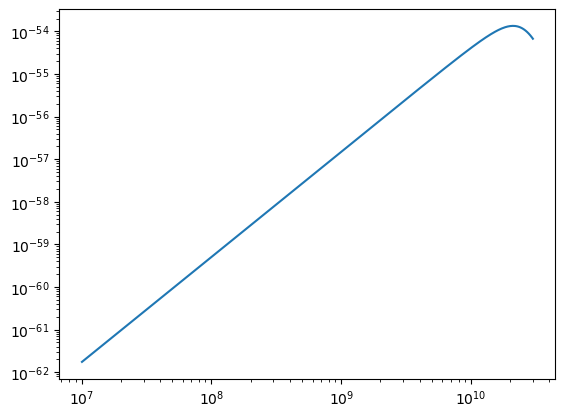

In [87]:
plt.loglog(omegas[inx], mu2_rotation[0,inx])

In [8]:
from full_Stokes import spd_full_Stokes

In [88]:
test_class_0 = spd_full_Stokes(Omega_grid=omegas[inx], rot_dist_grid=mu2_rotation[0,inx], log_Omega=False, log_rot=False)
test_class_1 = spd_full_Stokes(Omega_grid=omegas[inx], rot_dist_grid=mu2_rotation[1,inx], log_Omega=False, log_rot=False)
test_class_2 = spd_full_Stokes(Omega_grid=omegas[inx], rot_dist_grid=mu2_rotation[2,inx], log_Omega=False, log_rot=False)

In [89]:
from util import homogeneous_dist

obs_omegas = np.arange(1, 200, 2)*1e9

In [90]:
full_stokes_result_0=test_class_0.generate_SED(obs_omegas, beta_tab[0], 2/3, 1,
                                                internal_dist=homogeneous_dist, 
                                                external_dist=homogeneous_dist, 
                                                max_workers=1, 
                                                full_Stokes=True)

In [91]:
full_stokes_result_1=test_class_1.generate_SED(obs_omegas, beta_tab[1], 2/3, 1,
                                            internal_dist=homogeneous_dist, 
                                            external_dist=homogeneous_dist, 
                                            max_workers=1, 
                                            full_Stokes=True)

In [92]:
full_stokes_result_2=test_class_2.generate_SED(obs_omegas, beta_tab[2], 2/3, 1,
                                            internal_dist=homogeneous_dist, 
                                            impulse=1,
                                            external_dist=homogeneous_dist, 
                                            max_workers=1, 
                                            full_Stokes=True)

In [93]:
full_stokes_result_tot = full_stokes_result_0 + full_stokes_result_1 + full_stokes_result_2

In [94]:
full_stokes_result_tot.shape

(4, 100)

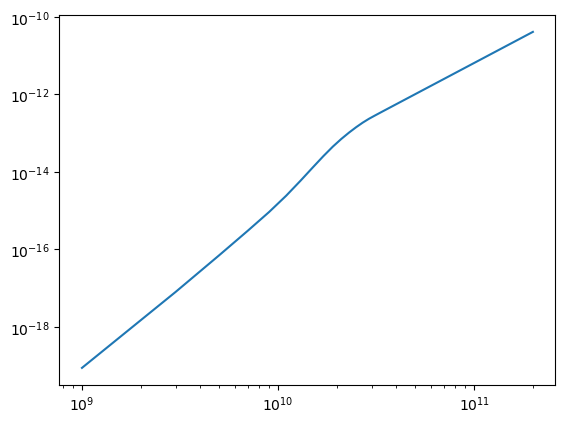

In [101]:
plt.loglog(obs_omegas, full_stokes_result_1[0,:])
#plt.ylim(1e-17,1e-12)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x_grid = np.logspace(1, 3, 10)  # 10^1 to 10^3
y_grid = x_grid**2 * 1e-5  # y = x² scaled

# Create interpolator
f = interp_func_1d(x_grid, y_grid, loglog_scale=True)

# Generate test points (include extrapolation)
x_test = np.logspace(0, 4, 100)  # 10^0 to 10^4
y_true = x_test**2 * 1e-5
y_interp = f(x_test)

# Calculate relative error
rel_error = np.abs(y_interp - y_true)/y_true
print(f"Max relative error: {np.max(rel_error):.2e}")
print(f"Mean relative error: {np.mean(rel_error):.2e}")

# Plot results
plt.figure(figsize=(10,5))
plt.loglog(x_grid, y_grid, 'ro', label='Grid Points')
plt.loglog(x_test, y_interp, 'b--', label='Interpolation')
plt.loglog(x_test, y_true, 'g-', alpha=0.5, label='True Function')
plt.xlabel('x (log scale)')
plt.ylabel('y (log scale)')
plt.title('Log-Log Interpolation Test')
plt.legend()
plt.grid(which='both', alpha=0.3)
plt.show()

NameError: name 'interp_func_1d' is not defined